A dataset collected from Kaggle that contains information about customers purchases from a random Mall is used. 

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv', encoding = 'utf-8')

In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


This dataset contains 200 registers. We can see that each customer has a unique ID, a gender, an age, an annual income and a score. The spending score reflects the customer activity on the mall. It was calculated based on how frequently the customer goes to the mall, how much he spends each time, etc.

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Yes, you can use cluster techniques with categorical data (such as gender). But you would have to dummyfy them first. To simple things up I'll only use the numeric features from the dataset and add the customers gender after the creation of the clusters to help me taking out some conclusions of it.

Ok. Now we have three numeric features with different dimensions. That's no good for K-means. Every machine learning model expects the input data to be pre processed in a certain way. To help K-means job, let's normalize our data in order to set all our features in the same scale.

To do so, I'll use the function normalize from sklearn package. When you use this function, it also expects that you will be parsing an numpy array (instead of a pandas DataFrame).

In [8]:
import numpy as np
from sklearn import preprocessing

DF_ARRAY = np.array(df.iloc[:,2:5])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

we do have to tell the model how many clusters he will be grouping our data into. That is definitely a downside from K-means.

#### The Elbow Method

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. 

This method consists in parsing multiple values for K and calculating the sum of squared errors (SSE) for each one of them. We can plot both values and choose the best value for K.

Let's say we parse the value of K = 200. Since we have 200 data points in our dataset, that means each data point would be your own cluster and the SSE would be zero.

In [9]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 3)

# Training our model
kmeans.fit(DF_NORM)

KMeans(n_clusters=3)

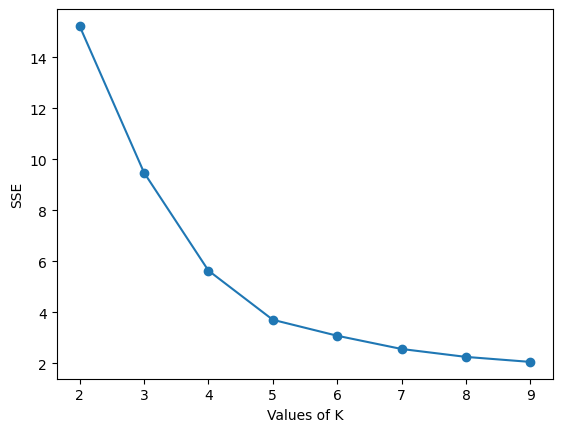

In [10]:
# Now let's create our own Elbow Method function to help us choose the amount of clusters we need.
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

As expected, **the higher the values of K, smaller are the value for SSE.**

Now let's use `four` as our total amount of clusters and train a new model. After that, I will assign the cluster label back to the original dataset.

**We trained our model with the normalized dataset, but the created labels are going to our original dataset DF. So we can take out our conclusions.**

In [12]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 4)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df['cluster'] = kmeans.labels_

In [13]:
from sklearn.decomposition import PCA
import pylab as pl

# Reducing data dimensions 
PCA_ = PCA(n_components = 2).fit(DF_ARRAY)

# Applying the PCA
PCA_2 = PCA_.transform(DF_ARRAY)

#--------------------------
# Plotting the cluster
#--------------------------

# Plot size
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

# Plotting each point individually depending on their cluster
for i in range(0, PCA_2.shape[0]):
    
    # If the 'i' data point be in cluster 0, it will be plotted as the formatting inside the if functions
    # And so on...
    if kmeans.labels_[i] == 0:
        CLUSTER_01 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='r', marker = 'o', s = 120)
        
    elif kmeans.labels_[i] == 1:
        CLUSTER_02 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='g', marker = 'o', s = 120)

    elif kmeans.labels_[i] == 2:
        CLUSTER_03 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='b', marker = 'o', s = 120)

    elif kmeans.labels_[i] == 3:
        CLUSTER_04 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='y', marker = 'o', s = 120)
        
        
        # Formatting the Plot
        pl.legend([CLUSTER_01, CLUSTER_02, CLUSTER_03, CLUSTER_04],
                  ['Cluster 01', 'Cluster 02', 'Cluster 03', 'Cluster 04'])
        
        pl.title('Mall Customers Categories')
        
pl.show()

NameError: name 'pylab' is not defined

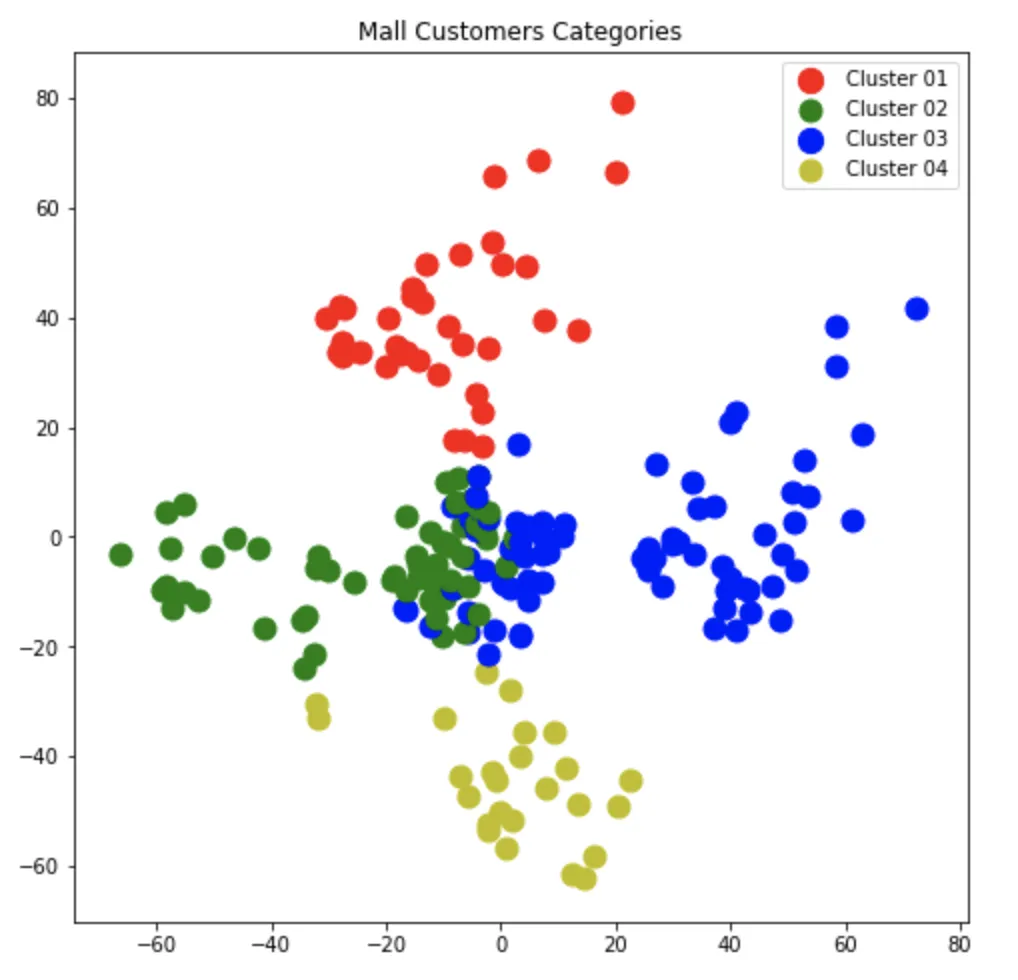